# Logistic Regressionfrom Scratch
  
  ### Main components of a Logistic Regression Code
  1. __Data__: Make sure the input data is in the right format for the Algorithm
  
  
  2. __Propagate__: Takes in the weights, X, and y andreturns the gradients and cost function
  
  
  3. __Optimize__: This function takes in the X,y data, initialized weights, and number of iterations, and learening rate and returns the updated weights.
  
  
  4. __Predict__: This function predicts the y given, X,w, and b
  
  
  5. __Model__: This is like a sklearn model, takes in X_train,y_train, X_test, y_test and hyperparameters and returns the updated weights and predictions.

In [2]:
# Libraries
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import random

%matplotlib inline

In [31]:
# Download the dataset
(x_train_raw, y_train_raw), (x_test_raw, y_test_raw) = tf.keras.datasets.mnist.load_data()
print(x_train_raw.shape)
print(y_train_raw.shape)

(60000, 28, 28)
(60000,)


In [4]:
def display_image(image_index, X, y):
    if image_index > len(y):
        raise IndexError('Index out of range: Index should be between 0 and {}'.format(len(y)))
    print(y[image_index])
    plt.imshow(X[image_index], cmap='Greys')

7


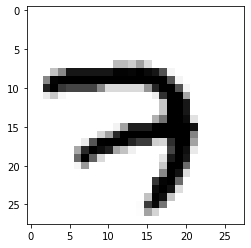

In [5]:
display_image(5000, x_train_raw, y_train_raw)

In [104]:
# Create a dataset for 5 vs non-5 classifier
y_train = np.asarray([1 if y==5 else 0 for y in y_train_raw]).reshape(1,y_train_raw.shape[0])
y_test = np.asarray([1 if y==5 else 0 for y in y_test_raw]).reshape(1,y_test_raw.shape[0])

print("y_train shape is {}".format(y_train.shape))
print("y_test shape is {}".format(y_test.shape))

y_train shape is (1, 60000)
y_test shape is (1, 10000)


In [14]:
# Number of training and testing examples
m_train = x_train_raw.shape[0]
m_test = x_test_raw.shape[0]

In [15]:
# create the X_train matrix
x_train_flat = x_train_raw.reshape(m_train,-1).T
print(x_train_flat.shape)
x_test_flat = x_test_raw.reshape(m_test,-1).T
print(x_test_flat.shape)

(784, 60000)
(784, 10000)


In [16]:
# normalize the pixels
x_train_set = x_train_flat/255
x_test_set = x_test_flat/255

print("X training image values ....",x_train_set[300])
print("X testing image values ....",x_test_set[300])

X training image values .... [0.         0.99215686 0.99607843 ... 0.         0.         0.57647059]
X testing image values .... [0.99607843 0.         0.         ... 0.11764706 0.99607843 0.        ]


## 3 - General Architecture of the learning algorithm ##

It's time to design a simple algorithm to distinguish cat images from non-cat images.

You will build a Logistic Regression, using a Neural Network mindset. The following Figure explains why **Logistic Regression is actually a very simple Neural Network!**


**Mathematical expression of the algorithm**:

For one example $x^{(i)}$:
$$z^{(i)} = w^T x^{(i)} + b \tag{1}$$
$$\hat{y}^{(i)} = a^{(i)} = sigmoid(z^{(i)})\tag{2}$$ 
$$ \mathcal{L}(a^{(i)}, y^{(i)}) =  - y^{(i)}  \log(a^{(i)}) - (1-y^{(i)} )  \log(1-a^{(i)})\tag{3}$$

The cost is then computed by summing over all training examples:
$$ J = \frac{1}{m} \sum_{i=1}^m \mathcal{L}(a^{(i)}, y^{(i)})\tag{6}$$

**Key steps**:
In this exercise, you will carry out the following steps: 
    - Initialize the parameters of the model
    - Learn the parameters for the model by minimizing the cost  
    - Use the learned parameters to make predictions (on the test set)
    - Analyse the results and conclude

In [27]:
# Initialize Weights

def initialize_weights(dim, init_type=0):
    """
    This function simply takes in the dimension of the feature vector to intiaize weights
    init_type: 0 means zero initializetion
               1 means random initialization
    """
    
    if init_type == 0:
        w = np.zeros((dim,1))
        b = 0
    else:
        w = np.random.rand(dim,1)
        b = random.random()
        
    return w, b

In [28]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [91]:
def propagate_gradients(w, b, X, y):
    """
    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of size (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat) of size (1, number of examples)

    Return:
    cost -- negative log-likelihood cost for logistic regression
    dw -- gradient of the loss with respect to w, thus same shape as w
    db -- gradient of the loss with respect to b, thus same shape as b
    """
    
    num_samples = X.shape[1]
    
    A = sigmoid( np.dot(w.T,X) + b )
    
    # please refer to the formula of loss for logistic regression
    ylogA = np.multiply(y,np.log(A))
    _1_ylog1_A = np.multiply( 1-y, np.log(1-A) )
    LogLoss = ylogA + _1_ylog1_A
    
    cost = (-1/num_samples)*np.sum(LogLoss)
    
    dw = (1/num_samples)*np.dot(X, (A-y).T)
    db = (1/num_samples)*np.sum(A-y)
    
    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    cost = np.squeeze(cost)
    assert(cost.shape == ())
    
    grads = {
        'dw': dw,
        'db': db
    }
    
    return grads, cost

In [92]:
w, b, X, Y = np.array([[1.],[2.]]), 2., np.array([[1.,2.,-1.],[3.,4.,-3.2]]), np.array([[1,0,1]])
grads, cost = propagate_gradients(w, b, X, Y)
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))
print ("cost = " + str(cost))

dw = [[0.99845601]
 [2.39507239]]
db = 0.001455578136784208
cost = 5.801545319394553


In [111]:
def optimize(w, b, X, y, num_iterations, lr, print_cost=False):
    """
    This function is used to optimize the w and b parameters by using the gradient descent algorithm
    
    Process: Gradient descent in Logistic Regression takes in w, b, X, y and uses propagate 
    gradients to update the w and b parameters.
    
    The only new thing that happens here is that the gradient propagation function is called multiple times
    """
    
    costs = []
    
    for i in range(num_iterations):
        
        grads, cost = propagate_gradients(w, b, X, y)
        
        dw = grads['dw']
        db = grads['db']
        
        w -= np.multiply(lr, dw)
        b -= lr*db
        
        if i%100 == 0:
            costs.append(cost)
            
            if print_cost:
                print("Cost after iteration {} is {:02.2f}".format(i,cost))
                
                
    params = {
        'w':w,
        'b':b
    }
        
    grads = {
        'dw':dw,
        'db':db
    }
    
    return params, grads, costs

In [93]:
w, b, X, Y = np.array([[1.],[2.]]), 2., np.array([[1.,2.,-1.],[3.,4.,-3.2]]), np.array([[1,0,1]])

params, grads, costs = optimize(w, b, X, Y, num_iterations= 100, lr = 0.009, print_cost = True)

print ("w = " + str(params["w"]))
print ("b = " + str(params["b"]))
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))

Cost after iteration 0 is 5.80
w = [[0.19033591]
 [0.12259159]]
b = 1.9253598300845747
dw = [[0.67752042]
 [1.41625495]]
db = 0.21919450454067652


In [102]:
def predict(w, b, X):
    """
    predict y given X
    """
    #number of samples
    m = X.shape[1]

    y_predicted = np.zeros((1, m))
    w = w.reshape(X.shape[0],1)
    
    
    A = sigmoid( np.dot(w.T, X) + b )
    
    for i in range(m):
        if A[0,i] > 0.5:
            y_predicted[0,i] = 1
        else:
            y_predicted[0,i] = 0
    
    assert(y_predicted.shape == (1,m))
    
    return y_predicted

In [101]:
w = np.array([[0.1124579],[0.23106775]])
b = -0.3
X = np.array([[1.,-1.1,-3.2],[1.2,2.,0.1]])
print ("predictions = " + str(predict(w, b, X)))

m 3
predictions = [[1. 1. 0.]]


In [106]:
def classification_accuracy(predicted_labels, true_labels):
    return np.mean(predicted_labels == true_labels)*100

In [108]:
def model(X_train, y_train, X_test, y_test, num_iterations=2000, lr=0.5, print_cost=False):
    """
    This function primarily calls the optimize function to find the w and b parmaters
    This also calculates the training and testing accuracy
    """
    
    N_features = X_train.shape[0]
    m_train = y_train.shape[1]
    m_test = y_test.shape[1]
    
    # 1. Initialize parameters
    w, b = initialize_weights(N_features, init_type=1)
    
    # 2. Obtain optimized w* and b* parameters
    params, grads, costs = optimize(w, b, X_train, y_train, num_iterations, lr, print_cost)
    
    w = params['w']
    b = params['b']
    
    # 3. Use the w* and b* to make predictions on the training set
    y_predict_train = predict(w, b, X_train)
    y_predict_test = predict(w, b, X_test)

    train_accuracy = classification_accuracy(y_predict_train,y_train)
    test_accuracy = classification_accuracy(y_predict_test,y_test)
    
    print("Training Accuracy = {:2.3f}".format(train_accuracy))
    print("Testing Accuracy = {:2.3f}".format(test_accuracy))
    
    d = {"costs": costs,
         "Y_prediction_test": y_predict_test, 
         "Y_prediction_train" : y_predict_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : lr,
         "num_iterations": num_iterations,
         "test_accuracy":test_accuracy,
         "train_accuracy":train_accuracy}
    
    return d

In [110]:
d = model(x_train_set, y_train, x_test_set, y_test, num_iterations = 2000, lr = 0.05, print_cost = True)

/home/sidroy/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in log
/home/sidroy/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in multiply


Cost after iteration 0 is nan
Cost after iteration 100 is 0.73
Cost after iteration 200 is 0.43
Cost after iteration 300 is 0.31
Cost after iteration 400 is 0.26
Cost after iteration 500 is 0.23
Cost after iteration 600 is 0.21
Cost after iteration 700 is 0.20
Cost after iteration 800 is 0.19
Cost after iteration 900 is 0.18
Cost after iteration 1000 is 0.17
Cost after iteration 1100 is 0.17
Cost after iteration 1200 is 0.16
Cost after iteration 1300 is 0.16
Cost after iteration 1400 is 0.15
Cost after iteration 1500 is 0.15
Cost after iteration 1600 is 0.15
Cost after iteration 1700 is 0.15
Cost after iteration 1800 is 0.14
Cost after iteration 1900 is 0.14
Training Accuracy = 95.15
Testing Accuracy = 95.61
